In [1]:
%pylab inline
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


In [2]:
def func(z, omega_m=0.3, omega_l=0.7, omega_k=0.0):
    return 1.0/sqrt(omega_m * (z+1)**3 + omega_k * (z+1)**2 + omega_l)

In [7]:
n_points = 1000
z_range = linspace(0,0.1, n_points)
E_integral = zeros(n_points)

for i in range(n_points):
    E_integral[i],err = integrate.quad(func,0,z_range[i],args=(0.3,0.7,0.0))

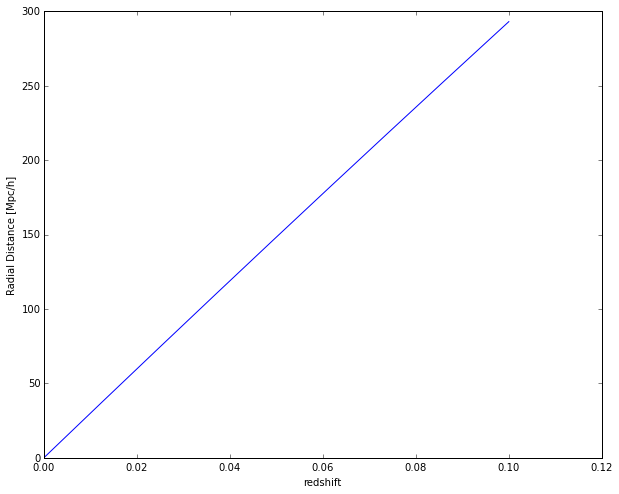

In [8]:
fig = plt.figure(figsize=(10, 8.0))
D_hubble = 3000.0
plot(z_range, D_hubble * E_integral)
xlabel("redshift")
ylabel("Radial Distance [Mpc/h]")

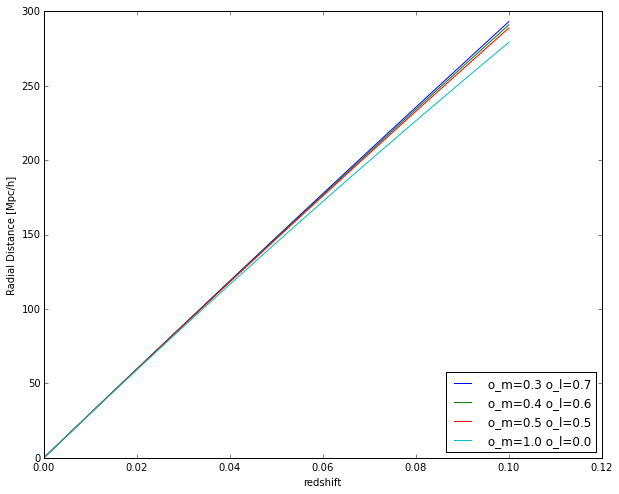

In [9]:
fig = plt.figure(figsize=(10, 8.0))
omega_m = array([0.3,0.4,0.5,1.0])
omega_l = 1.0 - omega_m
omega_k = 1.0 - (omega_m + omega_l)

for o_m, o_l, o_k in zip(omega_m, omega_l, omega_k):
    for i in range(n_points):
        E_integral[i],err = integrate.quad(func,0,z_range[i],args=(o_m,o_l,o_k))
        
    plot(z_range, D_hubble * E_integral, label=" o_m={} o_l={}".format(o_m,o_l))

xlabel("redshift")
ylabel("Radial Distance [Mpc/h]")
legend(loc=4)

In [5]:
def func_time(z, omega_m=0.3, omega_l=0.7, omega_k=0.0):
    return 1.0/sqrt(omega_m * (z+1)**3 + omega_k * (z+1)**2 + omega_l)/(z+1)

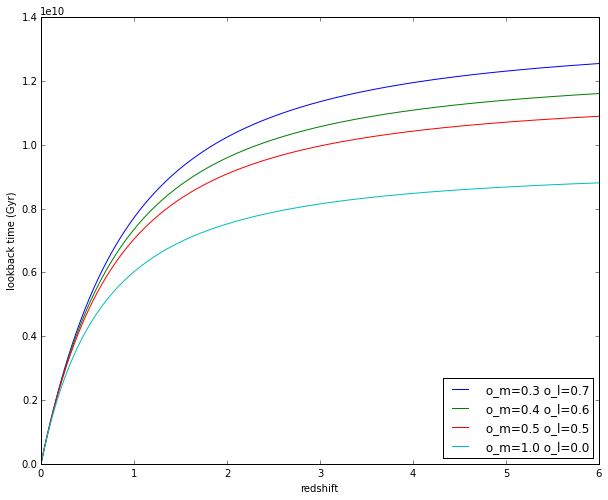

In [6]:
fig = plt.figure(figsize=(10, 8.0))
omega_m = array([0.3,0.4,0.5,1.0])
omega_l = 1.0 - omega_m
omega_k = 1.0 - (omega_m + omega_l)

hubble = 0.7
hubble_time = 9.78E9/hubble
for o_m, o_l, o_k in zip(omega_m, omega_l, omega_k):
    for i in range(n_points):
        E_integral[i],err = integrate.quad(func_time,0,z_range[i],args=(o_m,o_l,o_k))
        
    plot(z_range, E_integral * hubble_time, label=" o_m={} o_l={}".format(o_m,o_l))

xlabel("redshift")
ylabel("lookback time (Gyr)")
legend(loc=4)